 approximate bayesian computation simple rejection method
 doing this method first is useful to see what bounds we should use for the larger samples
 and also to resolve crucial issues with our analysis
 i.e. the convergence of summary statistics

In [1]:
import sys, os
import copy
join = lambda *x: os.path.abspath(os.path.join(*x))
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import scipy.stats

import pili
import parameters
import _fj
import fjanalysis
import twanalyse
import rtw
import sobol
import abcimplement
from abcimplement import rejection_abc


In [2]:
notedir = os.getcwd()
root = pili.root
# candidate to compare against
simdir = join(root, "../run/5bfc8b9/cluster/mc4d")
plt.rcParams.update({
    'text.usetex': False,
    'figure.figsize': (20,20),
    'axes.labelsize': 20
    })



In [3]:
# load three parameter dataset
# use a dictionary to keep global namespace clean
mc3d = {}
mc3d["simdir"] = "/home/dan/usb_twitching/run/5bfc8b9/cluster/mc3d_frozen"
# remove the activty metric from the pool
# how to combine lvel similarity with other scores? Can't use l2 norm
mc3d["objectives"] = ['lvel.mean', 'deviation.var', 'qhat.estimate', 'fanjin.top.ks_statistic']
# mc3d["objectives"] = ['lvel.mean', 'deviation.var', 'qhat.estimate']
mc3d = abcimplement.load_problem_simulation(mc3d)
# reload mc4d data as well
mc4d = {}
mc4d["simdir"] = simdir
mc4d = abcimplement.load_problem_simulation(mc4d)


nan found in lvel.mean. filtering 5 samples
nan found in deviation.var. filtering 5 samples
nan found in qhat.estimate. filtering 5 samples
nan found in fanjin.top.ks_statistic. filtering 5 samples
failed: Counter({'step_condition': 5})
filtered out 5/40000 samples
loaded data from  /home/dan/usb_twitching/run/5bfc8b9/cluster/mc3d_frozen
failed: Counter()
filtered out 0/10000 samples
loaded data from  /home/dan/usb_twitching/run/5bfc8b9/cluster/mc4d


In [4]:
all_idx, ltrs = _fj.slicehelper.load_linearized_trs("all")
reference_idx = _fj.load_subset_idx()
objectives = ['lvel.mean', 'deviation.var', 'qhat.estimate', 'ahat.estimate']
refdf = fjanalysis.compute_reference_data(ltrs, reference_idx, objectives)
subset = "top"
reference = refdf.iloc[1]
N = 400
reference

100%|██████████| 3113/3113 [00:01<00:00, 2367.54it/s]
/home/dan/usb_twitching/pili/src/analysis/twanalyse.py:957: RuntimeWarning: invalid value encountered in true_divide
  norm_dy = dy/np.linalg.norm(dy, axis=1)[:,np.newaxis]


subset                top
lvel.mean        0.072232
deviation.var    0.708642
qhat.estimate    0.572217
ahat.estimate    0.082484
Name: 1, dtype: object

In [5]:
mc3d["params"] = mc3d["data"].paramsdf(mc3d["objectives"])
statdf, statref = abcimplement.regularise_stats(mc3d["params"], reference, mc3d["objectives"])

# objective = 'fanjin.top.ks_statistic'
objective = 'deviation.var'
_regdf = statdf[mc3d["problem"]["names"] + [objective]]
accepted = rejection_abc(_regdf, [objective], statref, N)
accepted

0.01901019106588199
0.17414376229006154
0.09976806492764492
['deviation.var']
(39995, 1)
['deviation.var']
N = 400, delta = 0.14878680179305093, target = [4.06929397]


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


,dwell_time,pilivar,k_spawn,deviation.var,score
38038,0.594452,1.511697,2.510707,4.068853,0.000441
21289,1.011632,1.320589,2.007788,4.068791,0.000503
15228,1.477504,1.637066,2.216988,4.069798,0.000504
29800,2.982974,1.733684,0.501629,4.068059,0.001235
39764,2.488509,2.124924,4.752028,4.067788,0.001506
...,...,...,...,...,...
26336,2.515952,2.249592,3.473463,3.921300,0.147994
236,1.754132,1.937178,3.942834,3.920995,0.148299
31620,2.472903,2.307946,4.922370,4.217994,0.148700
31723,2.981109,2.281412,4.610286,4.218022,0.148728


['lvel.mean']
(39995, 1)
['lvel.mean']
N = 400, delta = 0.07986740627116751, target = [3.79962543]
(0, 1) dwell_time pilivar
(0, 2) dwell_time k_spawn
(1, 2) pilivar k_spawn
['deviation.var']
(39995, 1)
['deviation.var']
N = 400, delta = 0.14878680179305093, target = [4.06929397]
(0, 1) dwell_time pilivar
(0, 2) dwell_time k_spawn


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score
/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


(1, 2) pilivar k_spawn
['qhat.estimate']
(39995, 1)
['qhat.estimate']
N = 400, delta = 0.026988662773817396, target = [5.73546997]


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


(0, 1) dwell_time pilivar
(0, 2) dwell_time k_spawn
(1, 2) pilivar k_spawn
['fanjin.top.ks_statistic']
(39995, 1)
['fanjin.top.ks_statistic']
N = 400, delta = 0.29867806636620065, target = [0.]
(0, 1) dwell_time pilivar
(0, 2) dwell_time k_spawn
(1, 2) pilivar k_spawn


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


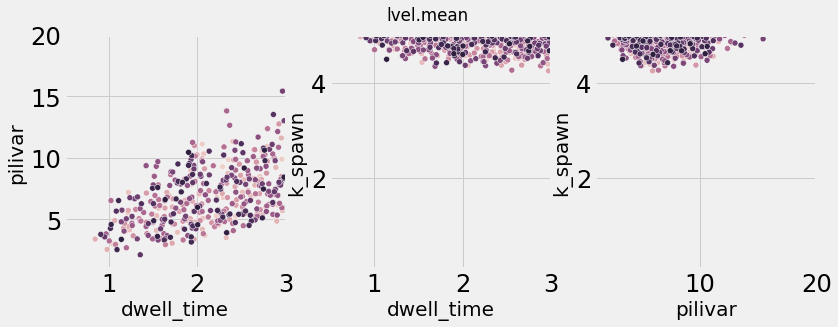

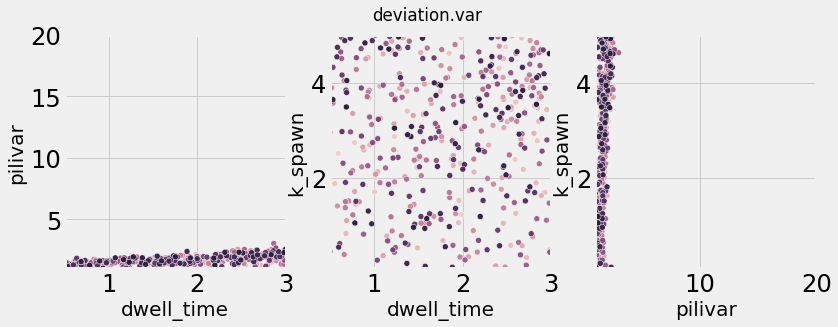

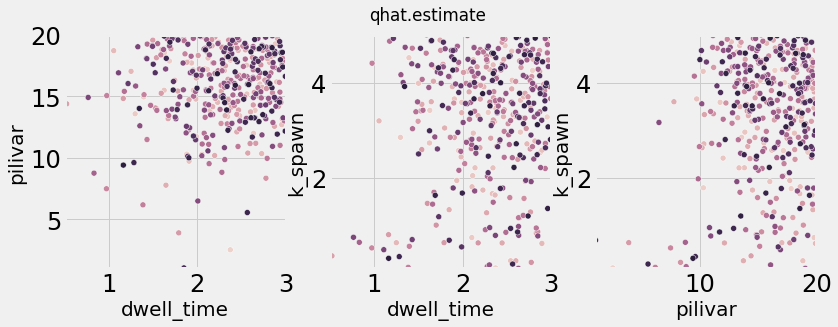

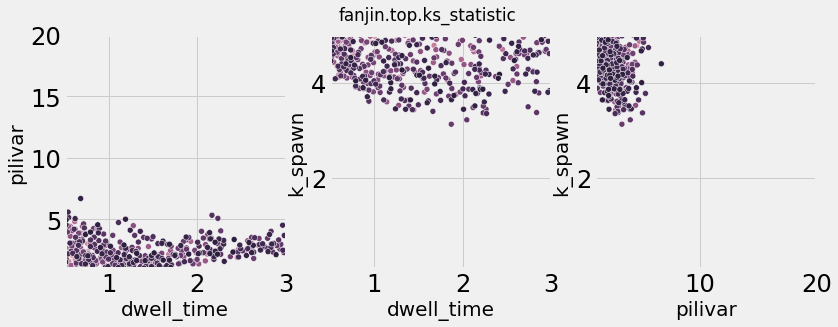

In [6]:
# 3d plotting as 3 pairs of projections
from abcimplement import plot_accepted_projection
for objective in mc3d["objectives"]:
    _regdf = statdf[mc3d["problem"]["names"] + [objective]]
    _accepted = rejection_abc(_regdf, [objective], statref, N)
    fig, axes = plot_accepted_projection(mc3d["problem"], _accepted)
    fig.suptitle(objective)


['lvel.mean', 'deviation.var']
(39995, 2)
['lvel.mean', 'deviation.var']
N = 400, delta = 0.9818400412610541, target = [3.79962543 4.06929397]
(0, 1) dwell_time pilivar
(0, 2) dwell_time k_spawn
(1, 2) pilivar k_spawn


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


Text(0.5, 0.98, "['lvel.mean', 'deviation.var']")

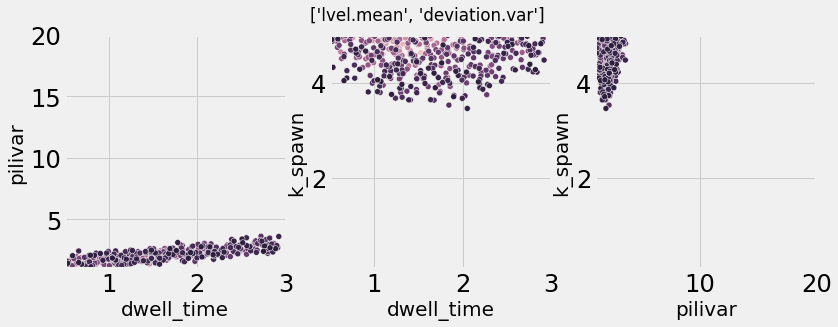

In [7]:
# all three remaining simple metrics
_objectives = ["lvel.mean", "deviation.var"]
# _objectives = ["deviation.var", "fanjin.top.ks_statistic"]
_regdf = statdf[mc3d["problem"]["names"] + _objectives]
_accepted = rejection_abc(_regdf, _objectives, statref, N)
fig, axes = plot_accepted_projection(mc3d["problem"], _accepted)
fig.suptitle(str(_objectives))


In [8]:
# lookup the step counts for this whole dataset
nsteps = mc3d["data"].get("linearsteps")
qhat = mc3d["data"].get("qhat.estimate")
qhat_err = mc3d["data"].get("qhat.err")
qdata = pd.DataFrame({"nsteps": nsteps, "q": qhat, "qhat_err": qhat_err})
_nsteps = mc4d["data"].get("linearsteps")
ahat = mc4d["data"].get("ahat.estimate")
ahat_err = mc4d["data"].get("ahat.err")
adata = pd.DataFrame({"nsteps": _nsteps, "a": ahat , "ahat_err": ahat_err})

Text(0.5, 0.98, 'convergence test')

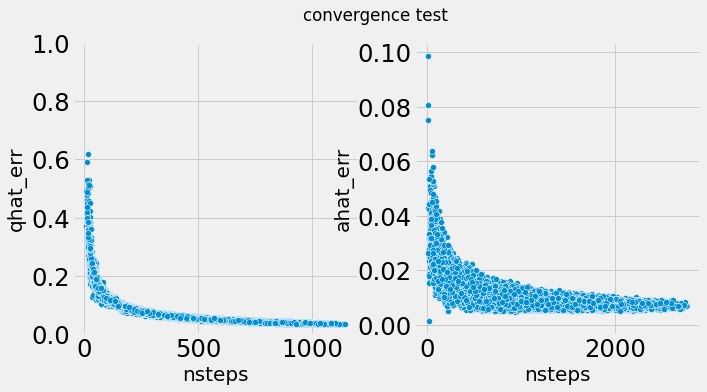

In [9]:
# lookup the step counts for this whole dataset
plt.rcParams.update({'text.usetex': False})
fig, axes = plt.subplots(1,2,figsize=(10,5))
g = sns.scatterplot(data=qdata,
    x="nsteps", y="qhat_err", ax=axes[0]) 
axes[0].set_ylim((0,1))
# g.ax.axhline(0.05)
g = sns.scatterplot(data=adata,
    x="nsteps", y="ahat_err", ax=axes[1]) 
# g.ax.set_xlim((0,1))
fig.suptitle("convergence test")


 * plot this for all four objectives
   - don't have a standard error estimate for deviation.var, ahat is in another dataset
     that leaves lvel.mean and qhat, lvel.mean should converge faster
     (also its error is currently calculated from correlated samples)
 * map low step count back to parameter space
 what err should we aim for? 0.05?
 * (probably) implement adaptive simulation max time

selected 20865/39995
(0, 1) dwell_time pilivar
(0, 2) dwell_time k_spawn
(1, 2) pilivar k_spawn


(<Figure size 864x288 with 3 Axes>,
 array([<AxesSubplot:xlabel='dwell_time', ylabel='pilivar'>,
        <AxesSubplot:xlabel='dwell_time', ylabel='k_spawn'>,
        <AxesSubplot:xlabel='pilivar', ylabel='k_spawn'>], dtype=object))

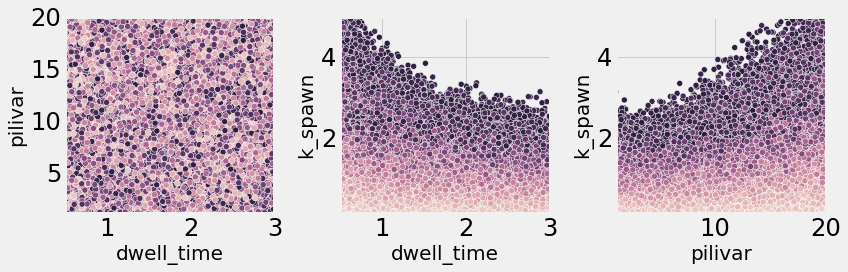

In [10]:
# map nsteps < 500 back onto parameter axes
_paramdf  = mc3d["data"].paramsdf(["linearsteps"])
_df3d = _paramdf[_paramdf["linearsteps"] < 500]
print("selected {}/{}".format(len(_df3d) , len(_paramdf)))
plt.rcParams.update({'axes.labelsize': 20})
abcimplement.problemplot3d(mc3d["problem"], _df3d, hue="linearsteps", snskw={"legend":False})
# nsteps varies mainly with k_spawn but simulations with < 500 steps span the entire space
# we should check if these runs actually failed 


In [11]:
# how do we do against simulated data?
# we need to update local.json with something like simulated.<uid>.ks_statistic
# or else it would be useful to store lvel locally ...


 our summary statistics are not informing us as to the value of dwell_time
 is this because the forward motion is constrained by anchor parameter?
 we can plug in tala estimates of 1.0s, 2.5s and report estimates for pilivar and k_spawn
 approximately (pilivar = 2.5, k_spawn = 5.0)


In [12]:
# now the same but with all pairs (4 choose 2) of metrics


In [13]:
# updated data is at
# /home/dan/usb_twitching/run/825bd8f/cluster/mc4d
new4d = {}
new4d["simdir"] = "/home/dan/usb_twitching/run/825bd8f/cluster/mc4d"
new4d["objectives"] = ['lvel.mean', 'deviation.var', 'qhat.estimate', 'ahat.estimate', 'fanjin.top.ks_statistic']
new4d = abcimplement.load_problem_simulation(new4d)

nan found in lvel.mean. filtering 1 samples
nan found in deviation.var. filtering 1 samples
nan found in qhat.estimate. filtering 1 samples
nan found in ahat.estimate. filtering 1 samples
nan found in fanjin.top.ks_statistic. filtering 1 samples
failed: Counter({'step_condition': 1})
filtered out 1/10000 samples
loaded data from  /home/dan/usb_twitching/run/825bd8f/cluster/mc4d


In [14]:
# print problem
print(new4d["problem"])
nsamples = int(1e4)
N = 200 
print("accept {}/{}".format(N,nsamples))

{'num_vars': 4, 'names': ['dwell_time', 'pilivar', 'anchor_angle_smoothing_fraction', 'k_spawn'], 'bounds': [[0.05, 3.0], [1.0, 15.0], [0.0625, 1.0], [0.1, 8.0]]}
accept 200/10000


0.0702688796044588
0.31113147275630193
0.1343752361814738
0.09403116839649117
['lvel.mean']
(9999, 1)
['lvel.mean']
N = 200, delta = 0.03274650243958477, target = [1.02793165]


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


['deviation.var']
(9999, 1)
['deviation.var']
N = 200, delta = 0.07308341501639193, target = [2.27762931]


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


['qhat.estimate']
(9999, 1)
['qhat.estimate']
N = 200, delta = 0.02127688565282071, target = [4.25834965]


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


['ahat.estimate']
(9999, 1)
['ahat.estimate']
N = 200, delta = 0.11957482543257836, target = [0.87719358]


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


['fanjin.top.ks_statistic']
(9999, 1)
['fanjin.top.ks_statistic']
N = 200, delta = 0.6962667749803279, target = [0.]


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


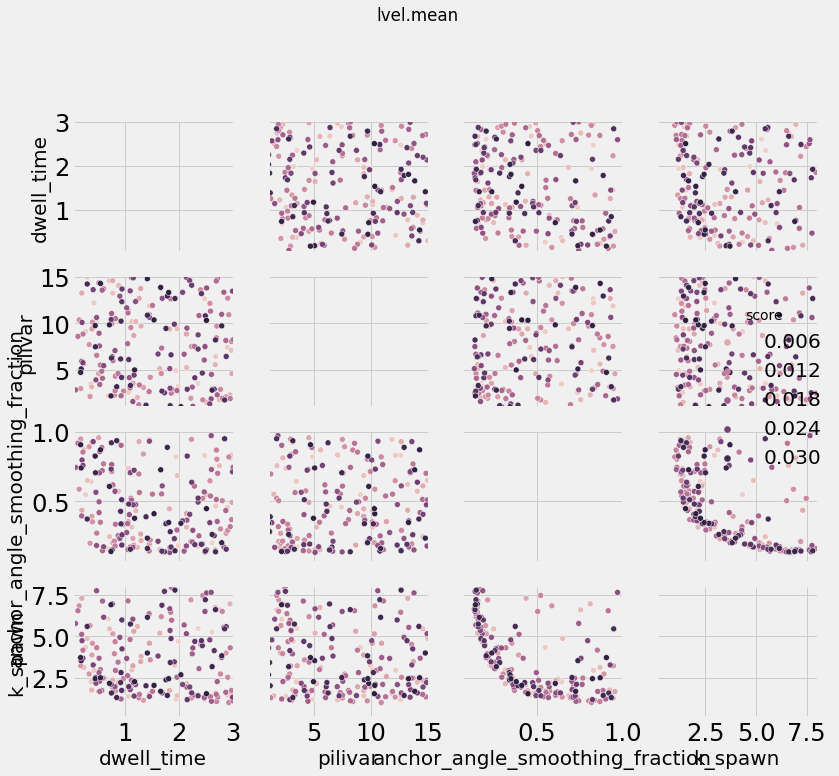

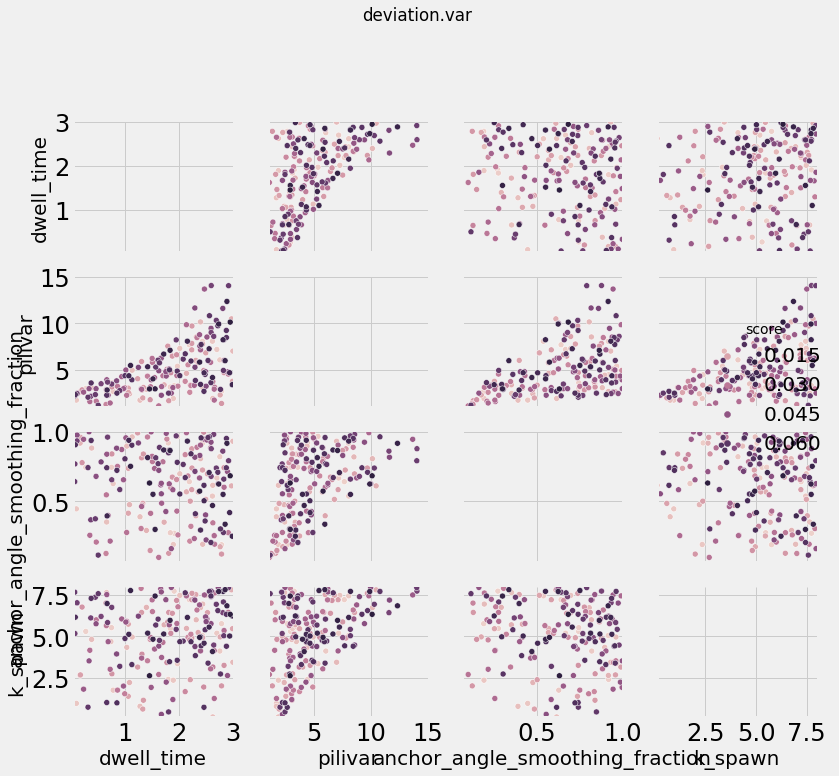

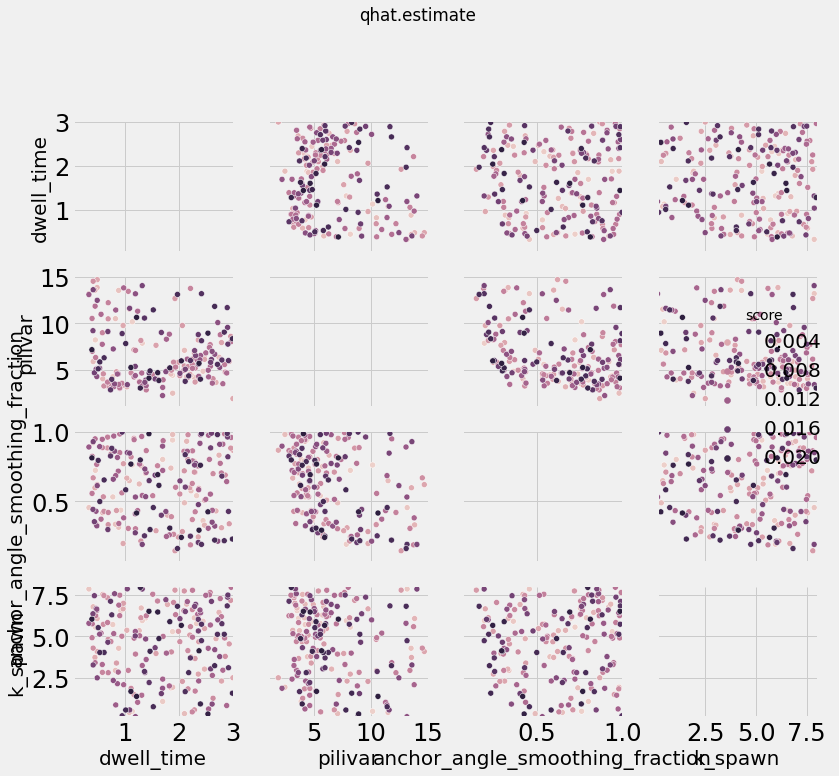

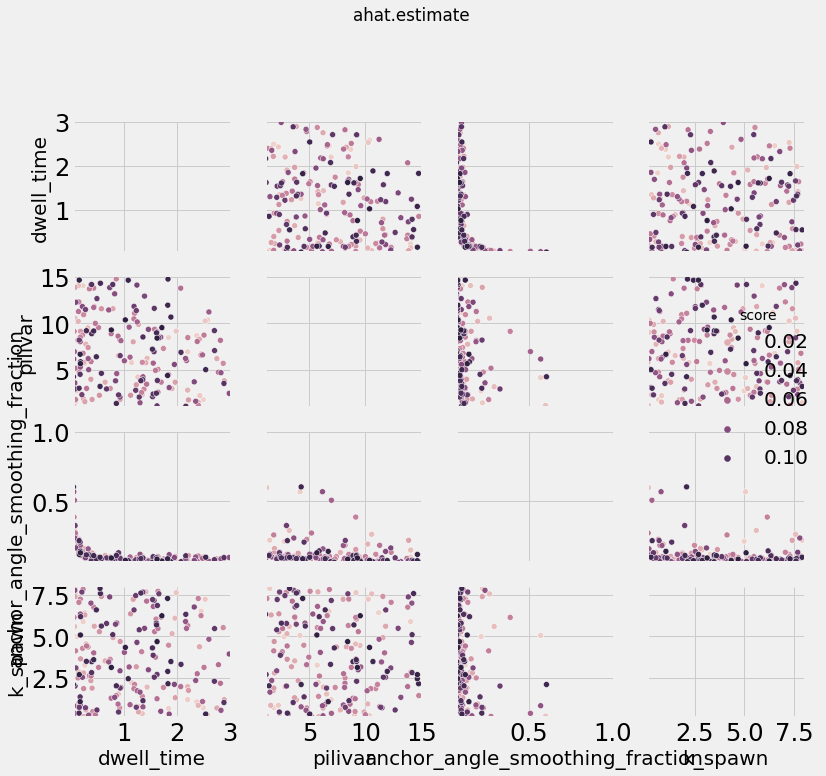

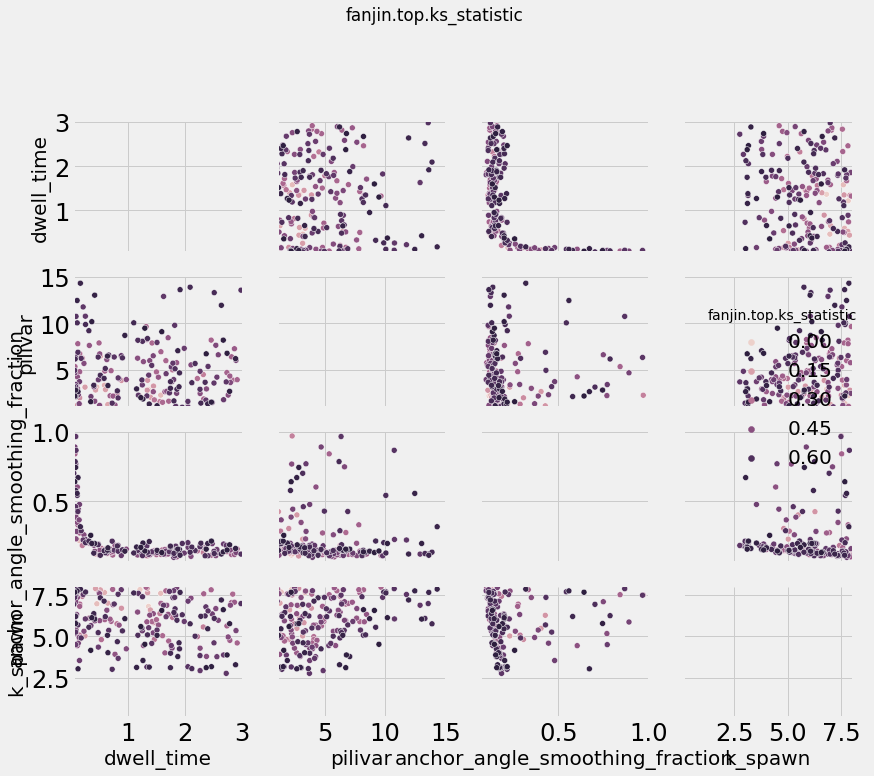

In [15]:
# one statistic at a time
new4d["params"] = new4d["data"].paramsdf(new4d["objectives"])
statdf, statref = abcimplement.regularise_stats(new4d["params"], reference, new4d["objectives"])
for objective in new4d["objectives"]:
    _regdf = statdf[new4d["problem"]["names"] + [objective]]
    _accepted = rejection_abc(_regdf, [objective], statref, N)
    # rename = {k:k for k in _accepted.keys()}
    # rename["anchor_angle_smoothing_fraction"] = "anchor"
    # _accepted.rename(columns=rename, inplace=True)
    abcimplement.problemplot4d(new4d["problem"], _accepted, objective)
    plt.tight_layout()

